<a href="https://colab.research.google.com/github/muhammadalfateh6/Muhammad_Alfateh_Work/blob/main/Saving_Weights_and_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import Sequential

In [ ]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.cifar10.load_data()
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

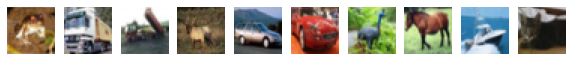

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(x_train[i])

In [ ]:
def getmodel():  
  model = Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'),
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(4, 4)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
def testing():
  model.evaluate(x_test, y_test)

In [ ]:
model=getmodel()

In [ ]:
#saving on every epoch

from tensorflow.keras.callbacks import ModelCheckpoint
check_path= 'model_checkpoints/checkpoint'
checkpoint = ModelCheckpoint(filepath=check_path, frequency='epoch', save_weights_only=True, verbose=1)
#model.fit(x_train, y_train, callbacks=[checkpoint], verbose=True, epochs=5)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
path =  'the_storage/checkpoint_{epoch:02d}_{batch:04d}'
checking = ModelCheckpoint(filepath=path, save_weights_only=True, save_freq=5000, verbose=2)
model.fit(x_train, y_train, callbacks=[checking], validation_data=(x_test, y_test), batch_size=5, epochs=3, verbose=1)

Epoch 1/3
2000/2000 [==============================] - 19s 10ms/step - loss: 1.0821 - accuracy: 0.6157 - val_loss: 1.9225 - val_accuracy: 0.4330
Epoch 2/3
2000/2000 [==============================] - 19s 10ms/step - loss: 1.0519 - accuracy: 0.6218 - val_loss: 1.7589 - val_accuracy: 0.4660
Epoch 3/3
 999/2000 [=============>................] - ETA: 10s - loss: 1.0132 - accuracy: 0.6358
Epoch 3: saving model to the_storage/checkpoint_03_1000
2000/2000 [==============================] - 20s 10ms/step - loss: 1.0420 - accuracy: 0.6288 - val_loss: 1.7175 - val_accuracy: 0.4830


In [ ]:
! ls -lh the_storage

total 184K
-rw-r--r-- 1 root root   93 Jan 28 17:27 checkpoint
-rw-r--r-- 1 root root 174K Jan 28 17:27 checkpoint_03_1000.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jan 28 17:27 checkpoint_03_1000.index


In [ ]:
x_train = x_train[:100]
y_train = y_train[:100]
x_test = x_test[:100]
y_test = y_test[:100]

In [ ]:
# saving only when the paramiter improves (monitoring):
path_2 = 'storage_2/checkpoint'
checkpointing =ModelCheckpoint(filepath=path_2,
                               save_weights_only=True,
                               save_freq='epoch',
                               monitor='val_accuracy',
                               save_best_only=True,
                               mode='max',
                               verbose=1)
history=model.fit(x_train, y_train, callbacks=[checkpointing], validation_data=(x_test, y_test), batch_size=10, epochs=50, verbose=1)

Epoch 1/50
 8/10 [=======================>......] - ETA: 0s - loss: 3.9312e-04 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 0.47000, saving model to storage_2/checkpoint
10/10 [==============================] - 0s 29ms/step - loss: 3.6584e-04 - accuracy: 1.0000 - val_loss: 4.6676 - val_accuracy: 0.4700
Epoch 2/50
 9/10 [==========================>...] - ETA: 0s - loss: 3.3749e-04 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.47000
10/10 [==============================] - 0s 24ms/step - loss: 3.6295e-04 - accuracy: 1.0000 - val_loss: 4.6709 - val_accuracy: 0.4700
Epoch 3/50
 9/10 [==========================>...] - ETA: 0s - loss: 3.5595e-04 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.47000
10/10 [==============================] - 0s 22ms/step - loss: 3.5968e-04 - accuracy: 1.0000 - val_loss: 4.6738 - val_accuracy: 0.4700
Epoch 4/50
 8/10 [=======================>......] - ETA: 0s - loss: 3.9757e-04 - accuracy: 1.0000
Epoch 4: val_a

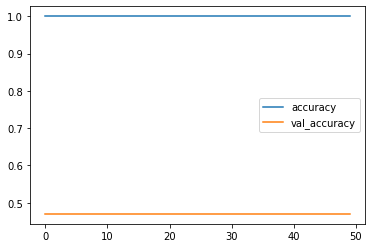

In [ ]:
import pandas as pd
f=pd.DataFrame(history.history)
f.plot(y=['accuracy', 'val_accuracy'])

In [ ]:
getmodel().load_weights(path_2)
test_loss, test_acc = getmodel().evaluate(x=x_test, y=y_test, verbose=1)
   

4/4 [==============================] - 0s 9ms/step - loss: 52.9996 - accuracy: 0.1400


In [ ]:
#saving the entire model

from tensorflow.keras.callbacks import ModelCheckpoint
model=getmodel()
path3 = 'third_storage'
che = ModelCheckpoint(filepath=path3,
                      save_weights_only=False,
                      frequency='epoch',
                      verbose=1)
model.fit(x_train, y_train, epochs=3, callbacks=[che], verbose=1)

Epoch 1/3
154/313 [=============>................] - ETA: 5s - loss: 3.1316 - accuracy: 0.1309

In [ ]:
! ls -lh third_storage

total 148K
drwxr-xr-x 2 root root 4.0K Jan 28 18:46 assets
-rw-r--r-- 1 root root  14K Jan 28 18:53 keras_metadata.pb
-rw-r--r-- 1 root root 124K Jan 28 18:53 saved_model.pb
drwxr-xr-x 2 root root 4.0K Jan 28 18:53 variables


In [ ]:
del model

In [ ]:
#Loading a presaved model
from tensorflow.keras.models import load_model

model=load_model(path3)
testing()

32/32 [==============================] - 0s 11ms/step - loss: 2.1445 - accuracy: 0.1960


In [ ]:
model.save('mypath')

In [ ]:
del model

In [ ]:
! ls -lh mypath.h5

-rw-r--r-- 1 root root 78K Jan 28 19:13 mypath.h5


In [ ]:
model = load_model('mypath')
testing()

32/32 [==============================] - 1s 19ms/step - loss: 2.3005 - accuracy: 0.1150
